In [ ]:
spam_dir = '/home/ikbr/Desktop/Practise/Project/spam-mail-detection/data/spam'
ham_dir = '/home/ikbr/Desktop/Practise/Project/spam-mail-detection/data/ham'

In [2]:
import os

emails = []
labels = []

for filename in os.listdir(spam_dir):
    with open(os.path.join(spam_dir, filename), 'r', encoding='latin-1') as file:
        emails.append(file.read())
        labels.append(1)
        
for filename in os.listdir(ham_dir):
    with open(os.path.join(ham_dir, filename), 'r', encoding='latin-1') as file:
        emails.append(file.read())
        labels.append(0)

In [3]:
emails

['From dbs@insiq.us  Tue Sep 10 11:13:58 2002\nReturn-Path: <dbs@insiq.us>\nDelivered-To: zzzz@localhost.spamassassin.taint.org\nReceived: from localhost (jalapeno [127.0.0.1])\n\tby zzzzason.org (Postfix) with ESMTP id 05C0716F03\n\tfor <zzzz@localhost>; Tue, 10 Sep 2002 11:13:56 +0100 (IST)\nReceived: from jalapeno [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor zzzz@localhost (single-drop); Tue, 10 Sep 2002 11:13:56 +0100 (IST)\nReceived: from mail1.insuranceiq.com (host66.insuranceiq.com\n    [65.217.159.66] (may be forged)) by dogma.slashnull.org (8.11.6/8.11.6)\n    with ESMTP id g89MvHC02964 for <zzzz@jmason.org>; Mon, 9 Sep 2002 23:57:17\n    +0100\nReceived: from mail pickup service by mail1.insuranceiq.com with Microsoft\n    SMTPSVC; Mon, 9 Sep 2002 18:58:26 -0400\nSubject: Term Insurance Is Out\nTo: <zzzz@spamassassin.taint.org>\nDate: Mon, 9 Sep 2002 18:58:26 -0400\nFrom: "IQ - DBS" <dbs@insiq.us>\nMessage-Id: <a024701c25854$67fbaf40$6b01a8c0@insuranceiq.com

In [4]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [5]:
import pandas as pd

df = pd.DataFrame({
    'text' : emails,
    'labels' : labels
})
df.head(10)

text  labels
0  From dbs@insiq.us  Tue Sep 10 11:13:58 2002\nR...       1
1  From marie_adolph@emailaccount.com  Sat Sep  7...       1
2  From afm@insiq.us  Fri Sep  6 11:51:23 2002\nR...       1
3  From batone3@hotmail.com  Fri Aug 23 12:20:43 ...       1
4  From firstever001@top10.bestoffersonthenet.com...       1
5  From k_u2_1999@consultant.com  Wed Sep  4 11:5...       1
6  From iteachabc@msn.com  Mon Sep  2 12:16:25 20...       1
7  From OWNER-NOLIST-SGODAILY*JM**NETNOTEINC*-COM...       1
8  From antheaygd@chinchilla.freeserve.co.uk  Wed...       1
9  From girl_with_toys_541652k57@yahoo.com  Mon A...       1

In [6]:
import re
import string
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/ikbr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def clean_text(text):
    text = text.lower()
    
    parts = text.split('\n\n', 1)
    if len(parts) > 1:
        text = parts[1]
    else:
        text = parts[0]

    text = re.sub(r'.*(multipart|content[-]?type|charset|boundary|content[-]?transfer[-]?encoding|nextpart|mime).*', '', text)

    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text(separator=" ")

    text = re.sub(r'http\S+|www\S+', '', text)

    text = re.sub(r'\S+@\S+', '', text)

    text = re.sub(r'\d+', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\s+', ' ', text).strip()

    words = text.split()

    css_garbage = {'visited', 'none', 'textdecoration', 'bcolor', 'nodedah', 'nonedavisited'}

    words = [w for w in words if w not in css_garbage]
    words = [w for w in words if len(w) > 2]
    words = [w for w in words if len(w) < 20]
    words = [w for w in words if not w.startswith('btext')]
    words = [w for w in words if not w.startswith('aactive')]
    words = [w for w in words if w not in stop_words]

    return ' '.join(words)

In [8]:
df['clean_text'] = df['text'].apply(clean_text)
df.head(10)

text  labels  \
0  From dbs@insiq.us  Tue Sep 10 11:13:58 2002\nR...       1   
1  From marie_adolph@emailaccount.com  Sat Sep  7...       1   
2  From afm@insiq.us  Fri Sep  6 11:51:23 2002\nR...       1   
3  From batone3@hotmail.com  Fri Aug 23 12:20:43 ...       1   
4  From firstever001@top10.bestoffersonthenet.com...       1   
5  From k_u2_1999@consultant.com  Wed Sep  4 11:5...       1   
6  From iteachabc@msn.com  Mon Sep  2 12:16:25 20...       1   
7  From OWNER-NOLIST-SGODAILY*JM**NETNOTEINC*-COM...       1   
8  From antheaygd@chinchilla.freeserve.co.uk  Wed...       1   
9  From girl_with_toys_541652k57@yahoo.com  Mon A...       1   

                                          clean_text  
0  term insurance permanent insurance diversified...  
1                                               bwma  
2  behind every elite produceris elite seminar sy...  
3  norton attention must computer users new speci...  
4  lowest rates available term life insurance tak...  
5  dear partner first must apologise using medium...  
6  week sydney bares park join live teen chat wat...  
7  reliaquote save life insurance life change ins...  
8  nonedah underlined otc newsletter discover tom...  
9

In [9]:
df = df[df['clean_text'].str.strip().astype(bool)]
df = df.drop_duplicates(subset=['clean_text'])

In [10]:
print(f"Number of 1s: {(df['labels'] == 1).sum()}")
print(f"Number of 0s: {(df['labels'] == 0).sum()}")

Number of 1s: 396
Number of 0s: 2689


In [11]:
x = df['clean_text']
y = df['labels']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42, stratify=y)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train_vec, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2

In [14]:
model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)
model.fit(x_train_vec,y_train)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [15]:
y_pred = model.predict(x_test_vec)

In [16]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [17]:
from sklearn.metrics import * 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9692058346839546

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       538
           1       0.94      0.81      0.87        79

    accuracy                           0.97       617
   macro avg       0.96      0.90      0.93       617
weighted avg       0.97      0.97      0.97       617



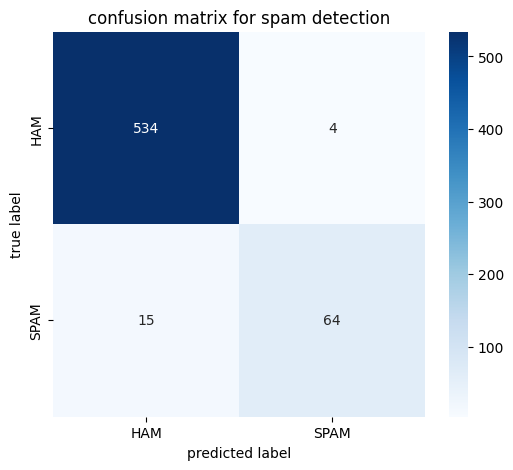

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
labels = ['HAM', 'SPAM']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('confusion matrix for spam detection')
plt.show()


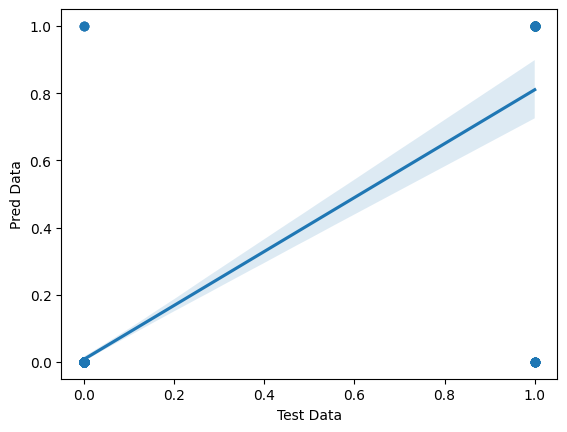

In [19]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('Test Data')
plt.ylabel('Pred Data')
plt.show()

In [20]:
test_emails = [

                # ======== 5 SPAM ==========
    """Subject: You Are The Lucky Winner!
Congratulations! You have been selected for a $1,000 Walmart gift card.
Click the link below to claim your prize now:
http://fakesite.com/claim
Act fast, this offer expires in 24 hours!
""",

    """Subject: Important Account Verification Required
Dear Customer,
We noticed unusual activity on your bank account. Please verify your information immediately to avoid suspension.
Click here to verify: http://phishy-banklogin.com
Thank you,
Your Bank Security Team
""",

    """Subject: Work From Home & Earn $500 Daily!
Are you tired of your 9 to 5 job? Start working from home today and earn $500 daily with zero investment!
Sign up here: http://get-rich-quick.biz
Limited slots available!
""",

    """Subject: Multiply Your Bitcoins Instantly!
Earn double your Bitcoin in just 24 hours! Guaranteed returns.
Join our VIP crypto group now and start earning:
http://bit-scammy.net
Don’t miss out!
""",

    """Subject: Invoice Attached - Action Required
Hello,
Your invoice is attached. Please review and confirm payment immediately to avoid late fees.
Download invoice: http://malicious-link.com/invoice
Thank you.
""",



                # ======== 5 HAM ==========
    """Subject: Weekly Status Report
Hi Team,
Please send your weekly status reports by end of day Friday. Let me know if you need any help.
Best,
Samantha
""",

    """Subject: Dinner Plans Tonight
Hey,
Are we still on for dinner tonight? Let me know what time works for you.
See you soon!
""",

    """Subject: Your Order Has Been Shipped
Hi John,
Good news! Your recent order #12345 has been shipped and is on its way.
You can track your package here:
https://real-store.com/track
Thanks for shopping with us!
""",

    """Subject: Project Kickoff Meeting
Hello Everyone,
This is a reminder for our project kickoff meeting scheduled for Monday at 10 AM in the main office.
Please bring your initial ideas and questions.
Regards,
Project Coordinator
""",

    """Subject: Monthly Tech Newsletter
Hello,
Here’s your July edition of the Tech Trends newsletter. This month we cover AI, cybersecurity, and the latest startup news.
Enjoy reading!
- Tech Trends Team
"""
]


In [21]:
def predict_spam(email_body, threshold=0.5):
    cleaned = clean_text(email_body)
    vector = vectorizer.transform([cleaned])
    proba = model.predict_proba(vector)[0]
    spam_proba = proba[1]
    ham_proba = proba[0]

    if spam_proba >= threshold:
        label = 'SPAM'
        confidence = spam_proba * 100
    else:
        label = 'HAM'
        confidence = ham_proba * 100
    return label, confidence

In [22]:
for email in test_emails:
    label, confidence = predict_spam(email)
    print(f"Label: {label} \t|\t Confidence: {confidence:.2f}%")

Label: SPAM 	|	 Confidence: 71.05%
Label: SPAM 	|	 Confidence: 57.81%
Label: HAM 	|	 Confidence: 62.43%
Label: SPAM 	|	 Confidence: 57.68%
Label: SPAM 	|	 Confidence: 51.09%
Label: HAM 	|	 Confidence: 80.41%
Label: HAM 	|	 Confidence: 83.29%
Label: HAM 	|	 Confidence: 84.29%
Label: HAM 	|	 Confidence: 51.72%
Label: HAM 	|	 Confidence: 65.64%


In [26]:
print(clean_text(
    """
 Subject: Monthly Tech Newsletter

Hello,

Here’s your July edition of the Tech Trends newsletter. This month we cover AI, cybersecurity, and the latest startup news.

Enjoy reading!

- Tech Trends Team
    """
))

hello here’s july edition tech trends newsletter month cover cybersecurity latest startup news enjoy reading tech trends team


In [ ]:
import pickle

with open('/home/ikbr/Desktop/Practise/Project/spam-mail-detection/models/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('/home/ikbr/Desktop/Practise/Project/spam-mail-detection/models/spam_model.pkl', 'wb') as f:
    pickle.dump(model, f)
